In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from pgmpy.estimators import HillClimbSearch, BicScore
from sklearn.preprocessing import KBinsDiscretizer
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

#Load the data
df=pd.read_csv("../diabetes.csv")

#View the data
df.head()

/opt/homebrew/Caskroom/miniforge/base/envs/xai/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#categorical outcome
train,test = train_test_split(df, test_size=0.2, random_state=42,stratify=df["Outcome"])

display(train["Outcome"].value_counts())
display(test["Outcome"].value_counts())
Y = train['Outcome']
X = train.iloc[:,0:-1]

Outcome
0    400
1    214
Name: count, dtype: int64

Outcome
0    100
1     54
Name: count, dtype: int64

In [10]:
#continuous outcome
df2=pd.read_csv("../insurance.csv")
dummy=pd.get_dummies(df2[['region',"sex","smoker"]], drop_first=False,dtype=float)
df2_dummy=pd.concat((df2.drop(columns=['region',"sex","smoker"]),dummy),axis=1)
train2,test2 = train_test_split(df2_dummy, test_size=0.2, random_state=42)
Y2 = train2['charges']
X2 = train2.drop(columns="charges")

In [11]:
model = sm.Logit(Y,X)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.610746
         Iterations 5


In [12]:
results.params

Pregnancies                 0.107076
Glucose                     0.013060
BloodPressure              -0.031346
SkinThickness              -0.000637
Insulin                     0.001291
BMI                        -0.001747
DiabetesPedigreeFunction    0.175677
Age                        -0.012715
dtype: float64

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Fri, 07 Jul 2023   Pseudo R-squ.:                 0.05535
Time:                        13:22:39   Log-Likelihood:                -375.00
converged:                       True   LL-Null:                       -396.97
Covariance Type:            nonrobust   LLR p-value:                 2.186e-07
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1071      0.032      3.330      0.001       0.044       0.170
Glucose                      0.0131      0.003      4.221      0.000       0.007       0.019
BloodPressure               -0.0313      0.005     -5.799      0.000      -0.042      -0.021
SkinThickness               -0.0006      0.007     -0.093      0.926      -0.014       0.013
Insulin                      0.0013      0.001      1.316      0.188      -0.001       0.003
BMI                         -0.0017      0.012     -0.145      0.884      -0.025       0.022
DiabetesPedigreeFunction     0.1757      0.272      0.645      0.519      -0.358       0.709
Age                         -0.0127      0.009     -1.368      0.171      -0.031       0.005
============================================================================================
"""

In [14]:
X2 = sm.add_constant(X2)
model = sm.OLS(Y2,X2)
results = model.fit()
results.params

const                -255.349206
age                   256.975706
bmi                   337.092552
children              425.278784
region_northeast      395.747943
region_northwest       25.070617
region_southeast     -262.116354
region_southwest     -414.051411
sex_female           -118.378757
sex_male             -136.970449
smoker_no          -11953.239031
smoker_yes          11697.889825
dtype: float64

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Fri, 07 Jul 2023   Prob (F-statistic):          1.32e-305
Time:                        13:22:39   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -255.3492    486.430     -0.525      0.600   -1209.824     699.125
age                256.9757     13.477     19.067      0.000     230.530     283.421
bmi                337.0926     32.471     10.381      0.000     273.378     400.807
children           425.2788    154.655      2.750      0.006     121.814     728.743
region_northeast   395.7479    334.472      1.183      0.237    -260.555    1052.051
region_northwest    25.0706    344.485      0.073      0.942    -650.878     701.019
region_southeast  -262.1164    373.002     -0.703      0.482    -994.022     469.789
region_southwest  -414.0514    351.224     -1.179      0.239   -1103.225     275.122
sex_female        -118.3788    306.741     -0.386      0.700    -720.266     483.509
sex_male          -136.9704    308.173     -0.444      0.657    -741.669     467.728
smoker_no        -1.195e+04    320.386    -37.309      0.000   -1.26e+04   -1.13e+04
smoker_yes         1.17e+04    352.808     33.157      0.000     1.1e+04    1.24e+04
==============================================================================
Omnibus:                      252.330   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.798
Skew:                           1.253   Prob(JB):                    5.19e-134
Kurtosis:                       5.737   Cond. No.                     8.25e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
poission_model = sm.GLM(Y2,X2, family=sm.families.Poisson())
result = poission_model.fit()

In [17]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                charges   No. Observations:                 1070
Model:                            GLM   Df Residuals:                     1061
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3251e+06
Date:                Fri, 07 Jul 2023   Deviance:                   2.6384e+06
Time:                        13:22:40   Pearson chi2:                 3.31e+06
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.5888      0.001   5002.465      0.000       3.587       3.590
age                  0.0195   1.92e-05   1014.931      0.000       0.019       0.020
bmi                  0.0258   4.54e-05    567.864      0.000       0.026       0.026
children             0.0331      0.000    150.402      0.000       0.033       0.034
region_northeast     0.9370      0.000   1972.019      0.000       0.936       0.938
region_northwest     0.9057      0.000   1820.842      0.000       0.905       0.907
region_southeast     0.8670      0.001   1668.653      0.000       0.866       0.868
region_southwest     0.8791      0.001   1721.048      0.000       0.878       0.880
sex_female           1.8077      0.000   4145.639      0.000       1.807       1.809
sex_male             1.7811      0.000   3882.302      0.000       1.780       1.782
smoker_no            1.1201      0.000   2451.414      0.000       1.119       1.121
smoker_yes           2.4687      0.000   5630.933      0.000       2.468       2.470
====================================================================================
"""

In [18]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

GaussianNB()

In [19]:
vars=pd.DataFrame(clf.var_).T
vars.columns=["NonDiabeticVariances","DiabeticVariances"]

In [20]:
means=pd.DataFrame(clf.theta_).T
means.columns=["NonDiabeticMeans","DiabeticMeans"]
nb_data=pd.concat((vars,means),axis=1)
nb_data.index=clf.feature_names_in_

In [21]:
nb_data

,NonDiabeticVariances,DiabeticVariances,NonDiabeticMeans,DiabeticMeans
Pregnancies,8.865787,13.527328,3.315000,4.761682
Glucose,609.105755,1059.235076,109.852500,141.574766
BloodPressure,291.712787,418.231123,68.335000,71.514019
SkinThickness,213.873912,314.108165,19.690000,22.808411
Insulin,8192.343605,17039.373581,65.737500,102.831776
BMI,56.316989,55.678971,30.241500,35.210280
DiabetesPedigreeFunction,0.092974,0.130221,0.437523,0.552019
Age,134.433787,126.602182,31.285000,37.257009


In [22]:
means = clf.theta_

variances = clf.var_

priors = clf.class_prior_

x = test.iloc[0,:-1].values

log_probabilities = np.zeros(len(priors))

for i in range(len(priors)):
    likelihoods = -0.5 * (np.log(2 * np.pi * variances[i]) + (x - means[i]) ** 2 / variances[i])
    log_likelihood = np.sum(likelihoods)
    log_prior = np.log(priors[i])
    log_probabilities[i] = log_prior + log_likelihood

# convert log probabilities back to probabilities
probabilities = np.exp(log_probabilities)

# normalize the probabilities so they sum to 1
probabilities /= np.sum(probabilities)

print(probabilities)

[0.48406648 0.51593352]


In [23]:
clf.predict_proba(test.iloc[0:2,:-1])

array([[0.48406648, 0.51593352],
       [0.49720234, 0.50279766]])

## Bayesian Networks

In [24]:
enc = KBinsDiscretizer(n_bins=3, encode="ordinal")
X_binned = enc.fit_transform(X)
#easier for learning 

/opt/homebrew/Caskroom/miniforge/base/envs/xai/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [25]:
X_binned=pd.DataFrame(X_binned)
X_binned.columns=X.columns

In [26]:
# create data sample with 9 random variables:
est = HillClimbSearch(X_binned)
best_model = est.estimate(scoring_method=BicScore(X_binned))
edges=best_model.edges()
#est.estimate(max_indegree=1).edges()

edges

  0%|          | 9/1000000 [00:00<4:25:27, 62.78it/s]


OutEdgeView([('Glucose', 'Insulin'), ('BloodPressure', 'Age'), ('SkinThickness', 'BMI'), ('SkinThickness', 'Insulin'), ('Insulin', 'DiabetesPedigreeFunction'), ('BMI', 'BloodPressure'), ('Age', 'Pregnancies'), ('Age', 'Glucose')])

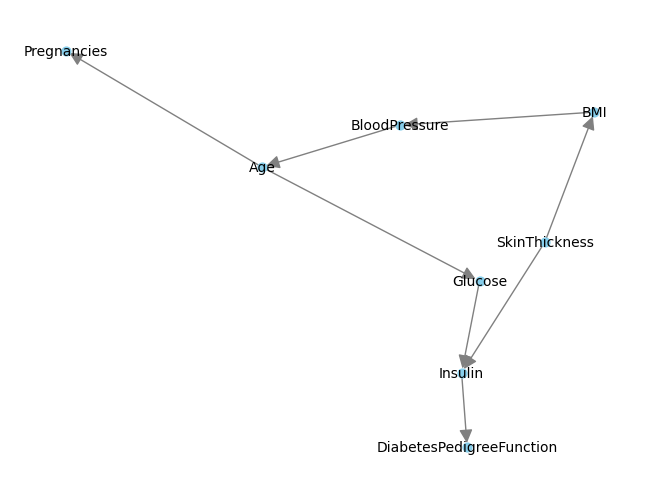

In [27]:
# Create a directed graph
graph = nx.DiGraph()

# Add edges to the graph
graph.add_edges_from(edges)

# Add edges to the graph
pos = nx.spring_layout(graph)

# Visualize the graph
#nx.draw(graph, pos, with_labels=True, node_size=20, font_size=10, node_color='skyblue', edge_color='gray', arrowsize=20)

nx.draw(graph,pos, with_labels=True, node_size=40, font_size=10, node_color='skyblue', edge_color='gray', arrowsize=20)

# Show the plot
#plt.show()
plt.show()

## Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree

In [29]:
dt = DecisionTreeClassifier(random_state=0)


In [30]:
dt.fit(X,Y)

DecisionTreeClassifier(random_state=0)

In [31]:
text_representation = export_text(dt)
print(text_representation)

|--- feature_1 <= 154.50
|   |--- feature_5 <= 27.35
|   |   |--- feature_1 <= 151.50
|   |   |   |--- feature_5 <= 9.10
|   |   |   |   |--- feature_0 <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  9.10
|   |   |   |   |--- feature_1 <= 133.50
|   |   |   |   |   |--- feature_5 <= 26.90
|   |   |   |   |   |   |--- feature_6 <= 0.68
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  0.68
|   |   |   |   |   |   |   |--- feature_6 <= 0.71
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_6 >  0.71
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  26.90
|   |   |   |   |   |   |--- feature_7 <= 44.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  44.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  133.50
|   |   |   |   | 

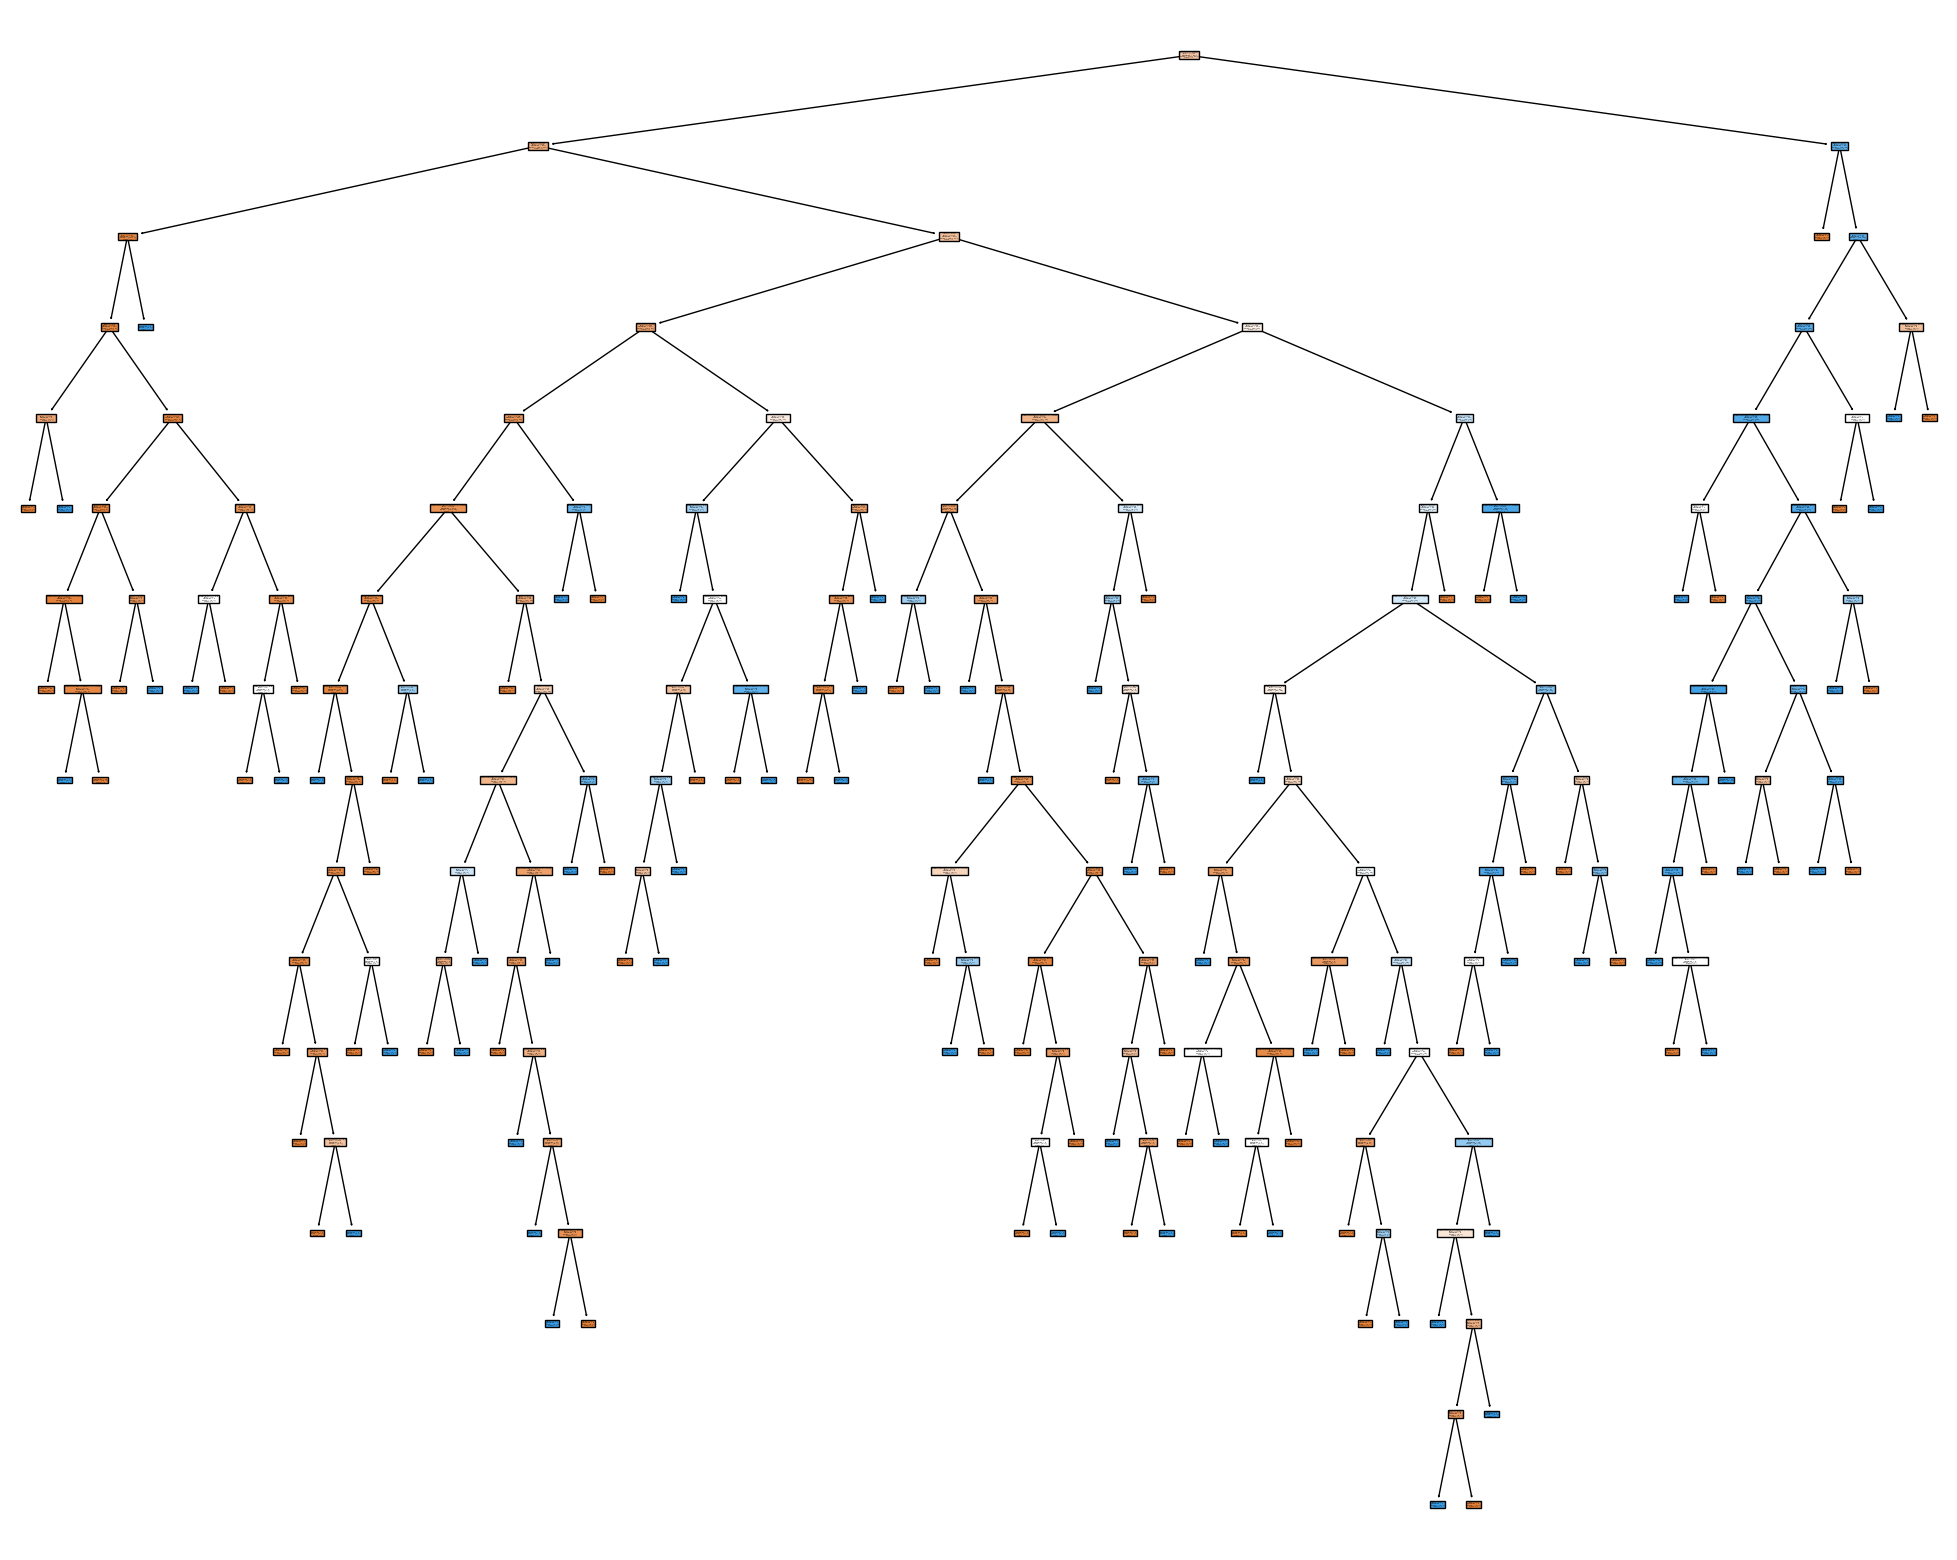

In [32]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt, 
                   feature_names=list(X.columns),  
                   class_names=["0","1"],
                   filled=True)

plt.savefig("tree.jpg",dpi=1000)

### Rule Induction

In [72]:
import Orange

data = Orange.data.Table("iris")

learner = Orange.classification.CN2UnorderedLearner()

# consider up to 10 solution streams at one time
learner.rule_finder.search_algorithm.beam_width = 10

# continuous value space is constrained to reduce computation time
learner.rule_finder.search_strategy.constrain_continuous = True

# found rules must cover at least 15 examples
learner.rule_finder.general_validator.min_covered_examples = 15

# found rules may combine at most 2 selectors (conditions)
learner.rule_finder.general_validator.max_rule_length = 2

classifier = learner(data)

In [77]:
for x in classifier.rule_list:
    print(x)

IF petal length<=3.0 AND sepal width>=2.9 THEN iris=Iris-setosa 
IF petal length>=3.0 AND petal length<=4.8 THEN iris=Iris-versicolor 
IF petal width>=1.8 AND petal length>=4.9 THEN iris=Iris-virginica 
IF TRUE THEN iris=Iris-setosa 
